# Video

In [40]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=10, n_features=5, n_informative=3, n_redundant=0, random_state=101)
print('Variance:', np.var(X, axis=0))

Variance: [1.3603 1.3689 0.9489 0.6457 1.735 ]


The lower variance (0.645) is associated with the third feature. To select the best features, let's set the minimum variance threshold to 1.0.

In [41]:
print(X)

[[-2.0241 -1.6643 -0.8276  0.0535  0.3486]
 [-1.8186 -0.5246 -0.0326 -1.6179 -1.2881]
 [ 1.4147  0.8881 -0.7628 -0.9761 -0.6841]
 [-2.1417 -2.6535  0.0134 -0.8882 -0.1888]
 [-0.4845 -1.1555 -1.8207 -0.3046  2.4767]
 [-0.7906  0.1922 -0.4819 -0.5666  0.6268]
 [-0.6765 -0.1045 -0.6404 -1.5625 -1.9187]
 [ 0.3778 -2.7921 -0.223   0.1714  0.9895]
 [-0.526   0.1997  1.6409  1.0499  1.2843]
 [ 1.028  -1.0496 -2.0525  0.2308 -1.4936]]


In [42]:
from sklearn.feature_selection import VarianceThreshold
X_selected = VarianceThreshold(threshold=1.0).fit_transform(X)
print('Before:', X[0, :])
print('After: ', X_selected[0, :])

Before: [-2.0241 -1.6643 -0.8276  0.0535  0.3486]
After:  [-2.0241 -1.6643  0.3486]


The third column is removed, and all the output observations to not have it. Only observations above 1.0 remain. Do not zed normalize your dataset before applying variance threshold.


## Univariate selection

Create data with the following line of code:

In [43]:
X, y = make_classification(n_samples=800, n_features=100, n_informative=25, 
                           n_redundant=0, random_state=101)

In [44]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import Binarizer, scale

Xbin = Binarizer().fit_transform(scale(X))

# if you use chi2, input X must be non-negative; X must contain booleans or frequencies
# hence the choice to binarize after the normalization if the variable is above the average
Selector_chi2 = SelectPercentile(chi2, percentile=25).fit(Xbin, y)
Selector_f_classif = SelectPercentile(f_classif, percentile=25).fit(X, y)
chi_scores = Selector_chi2.get_support()
f_classif_scores = Selector_f_classif.get_support()
selected = chi_scores & f_classif_scores

In [45]:
print(selected)

[False  True False False False False  True  True False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False False  True  True
 False False  True False False False False False False  True False False
 False False False False False False  True False  True False False  True
 False  True False False False False  True False False False False False
  True False False False  True False False False  True  True False False
  True False False False False  True False False False False False False
 False False False  True]


## Recursive Elimination




In [46]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=100, n_informative=5, n_redundant=2, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=101)
classifier.fit(X_train, y_train)
print('In-sample accuracy: %0.3f' % classifier.score(X_train, y_train))
print('Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test))

In-sample accuracy: 1.000
Out-of-sample accuracy: 0.767


In [48]:
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=classifier, step=1, cv=10, scoring='accuracy')
selector.fit(X_train, y_train)
print('Optimal number of features : %d' % selector.n_features_)


Optimal number of features : 33


In [49]:
X_train_s = selector.transform(X_train)
X_test_s = selector.transform(X_test)
classifier.fit(X_train_s, y_train)
print('Out-of-sample accuracy: %0.3f' % classifier.score(X_test_s, y_test))

Out-of-sample accuracy: 0.700


# Stability and L1-based selection

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.1, penalty='l2', random_state=1010)
classifier.fit(X_train, y_train)
print('Out-of-sample accuracy: %0.3f' % classifier.score(X_test, y_test))

Out-of-sample accuracy: 0.833


## Chapter 14: Feature Engineering for Domains: Domain-Specific Learning

In [51]:
#@title Files for Import
import_file = "mlwpy.py" #@param {type:"string"}

#import libraries
import re
import importlib

#create regex
find = re.compile(r"^(.*?)\..*")
# extract file name before .py ending
import_file_no_ext = re.search(find, import_file).group(1)

# copy file to the current notebook
!cp '/content/drive/MyDrive/Colab Notebooks/imports/{import_file}' .
# import module
module = importlib.import_module(import_file_no_ext)

# is there an __all__? if so import all
if '__all__' in module.__dict__:
    names = module.__dict__['__all__']
else:
    # otherwise import all names that don't begin with _
    names = [x for x in module.__dict__ if not x.startswith('_')]

# now bring them in
globals().update({k: getattr(module, k) for k in names})

print(f'Imported file: {import_file_no_ext}.py')

# set matplotlib to display inline
%matplotlib inline



Imported file: mlwpy.py


In [52]:
import cv2


## Wordwrap Display Output

In [53]:
# enable wordwrap
#https://stackoverflow.com/questions/58890109/line-wrapping-in-collaboratory-google-results
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
    td,th,p {
        font-size: 18px
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## Set Text Size

In [54]:
#save default font settings
IPython_default = plt.rcParams.copy()

# set fonts / set text size
#@title matplotlib font settings
small_text = 15 #@param {type:"integer"}
medium_text = 26 #@param {type:"integer"}
large_text = 28 #@param {type:"integer"}
line_marker_size = 5 #@param {type:"slider", min:0, max:10, step:0.5}
legend_shadow = True #@param {type:"boolean"}
fig_width =  8 #@param {type:"number"}
fig_height =  6 #@param {type:"number"}
sns_style = "ticks" #@param ["darkgrid", "whitegrid", "dark", "white", "ticks"]
axis_grid = True #@param {type:"boolean"}
sns_palette = "deep" #@param ["pastel", "muted", "bright", "deep", "colorblind", "dark"]

import matplotlib.pyplot as plt
import seaborn as sns

# restore defaults
plt.rcdefaults()

#run configuration parameters
plt.rcParams['axes.labelsize']   = small_text
plt.rcParams['axes.titlesize']   = small_text
plt.rcParams['xtick.labelsize']  = small_text
plt.rcParams['ytick.labelsize']  = small_text
plt.rcParams['legend.fontsize']  = small_text
plt.rcParams['legend.shadow']    = legend_shadow
plt.rcParams['lines.markersize'] = line_marker_size
plt.rcParams['figure.figsize']   = (fig_width, fig_height)
plt.rcParams['font.size']        = small_text

# seaborn settings
sns.set_style(sns_style, {"axes.grid": axis_grid})
sns.set_palette(sns_palette)



How do we convert text and image data to use with GOF algorithms?

## 14.1 Working with Text

Documents are (1) variable-length, (2) order-dependent, and (3) unaligned. 

Learning algorithms do not care about the ordering of features, documents do, because "the cat in the hat" is very different from "the hat in the cat". 

### 14.1.1 Encoding Text

Here are a few sample documents that we can use to investigate different ways of encoding text:

In [55]:
docs = ['the cat in the hat',
        'the cow jumped over the moon',
        'the cat mooed and the cow meowed',
        'the cat said to the cow cow you are not a cat']        

To create the features of interest, we need to record all the unique words occuring in the entire *corpus*, which is a term for the entire group of documents we are considering.

In [60]:
vocabulary = set(' '.join(docs).split())
print(vocabulary)

{'jumped', 'and', 'in', 'are', 'over', 'said', 'hat', 'cat', 'to', 'moon', 'meowed', 'not', 'mooed', 'a', 'you', 'cow', 'the'}


We remove some words unlikely to help us. The throwaway words are called *stop words*. After removing them, we are left with our focabulary of words that show up in the corpus.

In [61]:
#remove stop words
common_words = set(['a', 'to', 'the', 'in', 'and', 'are'])
vocabulary = vocabulary - common_words
print(textwrap.fill(str(vocabulary)))

{'jumped', 'over', 'said', 'hat', 'cat', 'moon', 'meowed', 'not',
'mooed', 'you', 'cow'}


#### 14.1.1.1 Binary Bags of Words

With the vocabulary in place, Python gets us a simple yes/no table of words in documents. The key test is the `w in d` that asks if a word is in a document.

In [76]:
# {k:v for k in lst} creates a dictionary from keys: values
# is is called a 'dictionary comprehension'
doc_contains = [{w: (w in d) for w in vocabulary} for d in docs]
df = pd.DataFrame(doc_contains)
df = df.reindex(sorted(df.columns), axis=1)
display(df)

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,True,False,True,False,False,False,False,False,False,False,False
1,False,True,False,True,False,False,True,False,True,False,False
2,True,True,False,False,True,True,False,False,False,False,False
3,True,True,False,False,False,False,False,True,False,True,True


#### 14.1.1.2 Bag-of-Word Counts

A tiny alteration of the first line gives us the *counts* of words in documents:

In [84]:
word_count = [{w: d.count(w) for w in vocabulary} for d in docs]
wcs = pd.DataFrame(word_count)
wcs = wcs.reindex(sorted(wcs.columns), axis=1)
display(wcs)

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,1,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,1,0,0
2,1,1,0,0,1,1,0,0,0,0,0
3,2,2,0,0,0,0,0,1,0,1,1


`sklearn` gives us this capability with `CountVectorizer`.

In [78]:
import sklearn.feature_extraction.text as sk_txt
sparse = sk_txt.CountVectorizer(stop_words='english').fit_transform(docs)
sparse

<4x8 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

The data is sparse and `sklearn` is clever. Therefore, the underlying machinery saves us space. Ifyou *really* want to see what's going on , turn a sparse form into a dense form with `todense`:

In [79]:
sparse.todense()

matrix([[1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0],
        [1, 1, 0, 0, 1, 1, 0, 0],
        [2, 2, 0, 0, 0, 0, 0, 1]])

There are slightly different results here because `sklearn` uses a few more stop words: *you, not*, and *over* are i nthe default English stop word list. Also, it's not obvious what the ordering of the words is in the `sklearn` output. However, it's all there.

#### 14.1.1.3 Noramlized Bag-of-Word Coutns: TF-IDF

There are two things we want to balance in the case of word counts:

1. We don't want longer documents to have stronger relationships with our target just because they are longer.
2. If words are frequent in *every* document, they are no longer a distinguishing factor. As the frequency of a word increases across the corpus, we'd like the word's contribution to drop.

Let's start by account for the frequency across all of the documents. We compute the corpus-wide frequency by asking, "How many docs contain our word?" We implement this in the following way:


In [85]:
# wcs.values.sum(axis=0, keepdims=True)
doc_freq = pd.DataFrame(wcs.astype(np.bool).sum(axis='rows')).T
doc_freq = doc_freq.reindex(sorted(doc_freq.columns), axis=1)
display(doc_freq)

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,3,3,1,1,1,1,1,1,1,1,1


Now we will go from a corpus frequency to an *inverse* frequency. Normally, we would do this with an equation like $\frac{1}{\text{freq}}$. However, in text learning, this is more complicated. We account for the number of docs and we take the logarithm of the value. The formlula for inverse-document frequency is $\text{IDF} = \log(\frac{\text{num docs}}{\text{freq}})$.

Logarithms have a magnifying and dilating effect. Taking the log of values greater than one, such as a positive number of documents, **compresses** the difference between values, while taking the log of values between zero and one, such as one divided by a count, **expands** the spacing.

The log amplifies the effect of different counts and suppresses the value of more and more documents. The number of documents in the numerator serves as a baseline value from which we adjust down.

In [86]:
idf = np.log(len(docs) / doc_freq)
# == np.log(len(docs)) - np.log(doc_freq)
idf = idf.reindex(sorted(idf.columns), axis=1)
display(idf)

,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,0.2877,0.2877,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863,1.3863


With this calculation, it's easy to create the *term frequency-inverse document frequency*, or TF-IDF. All we do is weight each word count by its respective IDF value.

In [87]:
print(idf.iloc[0])
tf_idf = wcs * idf.iloc[0] # aligns columns for multiplication
tf_idf = tf_idf.reindex(sorted(tf_idf.columns), axis=1)
display(tf_idf)

cat                    0.2877
cow                    0.2877
hat                    1.3863
jumped                 1.3863
meowed                 1.3863
mooed                  1.3863
moon                   1.3863
not                    1.3863
over                   1.3863
said                   1.3863
you                    1.3863
Name: 0, dtype: float64


,cat,cow,hat,jumped,meowed,mooed,moon,not,over,said,you
0,0.2877,0.0000,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.2877,0.0000,1.3863,0.0000,0.0000,1.3863,0.0000,1.3863,0.0000,0.0000
2,0.2877,0.2877,0.0000,0.0000,1.3863,1.3863,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.5754,0.5754,0.0000,0.0000,0.0000,0.0000,0.0000,1.3863,0.0000,1.3863,1.3863


We have yet to account for the unwanted benefits longer docs might get. We can keep them under control by insisting the total values across a document, when we add up all the weighted counts, be the same. This means docs are differentiated by the *proportion* of a fixed weight distributed over the word buckets, instead of the total amount across the buckets (which is now the same for everyone). We do this with `Normalizer`.

In [88]:
skpre.Normalizer(norm='l1').fit_transform(wcs)

array([[0.5   , 0.    , 0.5   , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    ],
       [0.    , 0.25  , 0.    , 0.25  , 0.    , 0.    , 0.25  , 0.    ,
        0.25  , 0.    , 0.    ],
       [0.25  , 0.25  , 0.    , 0.    , 0.25  , 0.25  , 0.    , 0.    ,
        0.    , 0.    , 0.    ],
       [0.2857, 0.2857, 0.    , 0.    , 0.    , 0.    , 0.    , 0.1429,
        0.    , 0.1429, 0.1429]])

The sum across a row is now 1.0. Our process mimics, inexactly, the same steps the `sklearn` performs with `TfidfVectorizer`. We will not try to reconcile our manual steps with the `sklearn` method. Just remember that, at a minimum, we are using different stop words which affects the weightings used for the IDF weights.

In [89]:
sparse = (sk_txt.TfidfVectorizer(norm='l1', stop_words='english')
                .fit_transform(docs))
sparse.todense()


matrix([[0.3896, 0.    , 0.6104, 0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.2419, 0.    , 0.379 , 0.    , 0.    , 0.379 , 0.    ],
        [0.1948, 0.1948, 0.    , 0.    , 0.3052, 0.3052, 0.    , 0.    ],
        [0.3593, 0.3593, 0.    , 0.    , 0.    , 0.    , 0.    , 0.2814]])

### 14.1.2 Example of Text Learning

We need a legitimate body of preclassified documents to put these ideas into practice. `sklearn` has tools to do this, though it is not installed with the `sklearn` distribution. We need to `import` and call a utility that downloads it.

In [90]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train')

The *Twenty Newsgroups* dataset consists of about 20,000 docs from 20 old-school Internet *newsgroups*. Newsgroups are a type of online forum acting a bit like an email thread that allows multiple people to participate at once. There are newsgroups for many different discussion topics, including religion and politics, sports, hobbies, and others. The classification problem is to take an arbitrary document and determine the discussion group it came from.

In [91]:
print('the groups:')
print(textwrap.fill(str(twenty_train.target_names)))

the groups:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
'sci.space', 'soc.religion.christian', 'talk.politics.guns',
'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


The actual contents of the examples are text emails including the header portion with a sender, receiver, and a subject. Here are the first ten lines of the first example:

In [92]:
print('\n'.join(twenty_train.data[0].splitlines()[:10]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 


Once we have the data, we can almost instantly apply the TF-IDF transformer to get a useful representation of our docs.

In [93]:
ct_vect     = sk_txt.CountVectorizer()
tfidf_xform = sk_txt.TfidfTransformer()

docs_as_counts = ct_vect.fit_transform(twenty_train.data)
docs_as_tfidf  = tfidf_xform.fit_transform(docs_as_counts)

Now, we can connect the data to any of our learning models. Here we use a variant of Naive Bayes:

In [94]:
model = naive_bayes.MultinomialNB().fit(docs_as_tfidf,
                                        twenty_train.target)

The following shows all steps wrapped up in a pipeline.

In [95]:
doc_pipeline = pipeline.make_pipeline(sk_txt.CountVectorizer(),
                                      sk_txt.TfidfTransformer(),
                                      naive_bayes.MultinomialNB())

Before ramping up for evaluation, let's reduce the number of categories we consider:

In [97]:
categories = ['misc.forsale',
              'comp.graphics',
              'sci.med',
              'sci.space']

We can go one step better. `TfidfVectorizer` combines two preprocessing, feature-extracting steps in one component. There is a super compact approach to this problem.

In [98]:
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories,
                                  shuffle=True,
                                  random_state=42)
doc_pipeline = pipeline.make_pipeline(sk_txt.TfidfVectorizer(),
                                      naive_bayes.MultinomialNB())

model = doc_pipeline.fit(twenty_train.data, twenty_train.target)

And we can quickly evaluate the quality of our model:

Text(64.7222222222222, 0.5, 'Actual')

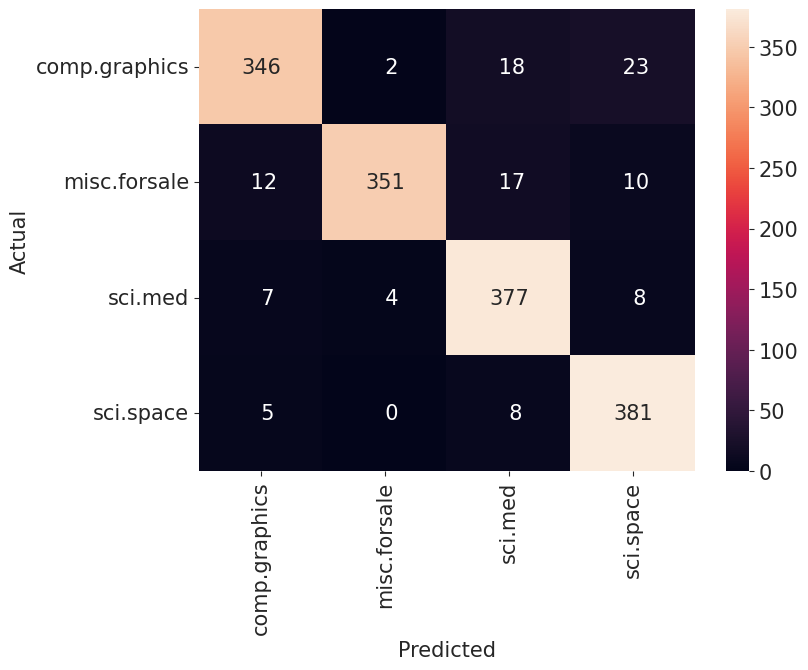

In [99]:
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories,
                                 shuffle=True,
                                 random_state=42)

doc_preds = model.predict(twenty_test.data)
cm = metrics.confusion_matrix(twenty_test.target, doc_preds)
ax = sns.heatmap(cm, annot=True,
                 xticklabels=twenty_test.target_names,
                 yticklabels=twenty_test.target_names,
                 fmt='3d') # cells are counts
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')                 

We are not putting together (1) feature engineering in the form of feature extraction from text documents to an example-feature table, (2) building a learning model from training data, and (3) looking at the evaluation of that model on separate testing data--all in about 25 lines of code over the last two code cells. Also, our results don't look too bad, either. Hopefully, you *understand* something about the steps we've just accomplished.
